In [1]:
import pandas as pd
import numpy as np
import re
from ast import literal_eval
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
file = '../data/spain-red'
df = pd.read_csv(file + '.csv', converters={'foods': literal_eval, 'highlights': literal_eval})

In [3]:
diacritics = {'&#237;': 'í', '&#243;': 'ó', '&#250;': 'ú', '&#241;': 'ñ', '&#232;': 'è', \
    '&#8364;': '€', '&#193;': 'Á', '&#192;': 'À', '&#233;': 'é', '&#224;': 'à', \
    '&#239;': 'ï', '&#231;': 'ç', '&#193;': 'Á', '&#252;': 'ü', '&#225;': 'á', '&#186;': 'º', \
    '&#244;': 'ô', '&#8217;': '’', '&#960;': 'π', '&#210;': 'Ò'}
df.replace(diacritics, regex=True, inplace=True)
df['winery'] = df['winery'].apply(lambda x: re.sub(r'((?<=[a-z_à-ÿ])[A-Z]|(?<!\A)[A-Z](?=[a-z_à-ÿ]))', r' \1', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub(r'((?<=[a-z_à-ÿ])[A-Z]|(?<!\A)[A-Z](?=[a-z_à-ÿ]))', r' \1', x))
df['region'] = df['region'].apply(lambda x: re.sub(r'((?<=[a-z_à-ÿ])[A-Z]|(?<!\A)[A-Z](?=[a-z_à-ÿ]))', r' \1', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub(r"(\S)\(", r'\1 (', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub('\(\s*(.*?)\s*\)', r'(\1)', x))
df['vintage'] = df['vintage'].apply(lambda x: re.sub(r"([0-9]+(\.[0-9]+)?)",r" \1 ", x).strip())
df['vintage'] = df['vintage'].replace(r'\s+', ' ', regex=True)

numeric_columns = ['year', 'rating', 'ratings_count', 'country_rank', 'region_rank', \
                   'winery_rank', 'global_rank', 'alcohol', 'body', 'acidity', 'price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df = df.drop(['drink_from', 'drink_until'], axis = 1)

In [4]:
df.describe()

,rating,ratings_count,country_rank,region_rank,winery_rank,global_rank,alcohol,body,acidity,price
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,1656.000000,1900.000000,1900.000000,2013.000000
mean,4.147992,744.478433,3.930590,5.692117,15.629152,4.140803,14.081582,4.271579,2.963158,87.068867
std,0.244010,1714.883180,3.456955,5.452801,12.844511,3.426670,1.634316,0.507897,0.188424,234.235746
min,3.700000,25.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,4.900000
25%,3.900000,86.000000,1.000000,2.000000,6.000000,1.000000,14.000000,4.000000,3.000000,18.950000
50%,4.100000,227.000000,3.000000,4.000000,12.000000,3.000000,14.500000,4.000000,3.000000,31.130000
75%,4.300000,659.000000,5.000000,8.000000,22.000000,6.000000,14.500000,5.000000,3.000000,61.950000
max,4.900000,32378.000000,22.000000,38.000000,81.000000,20.000000,16.500000,5.000000,3.000000,3404.940000


In [4]:
df.corr()

,year,rating,ratings_count,country_rank,region_rank,winery_rank,global_rank,alcohol,body,acidity,price
year,1.000000,-0.314473,0.030299,0.162954,0.127318,0.045221,0.178732,0.065335,0.032963,-0.011623,-0.320569
rating,-0.314473,1.000000,-0.048397,-0.646188,-0.526214,-0.277739,-0.688412,0.059804,0.156220,-0.035408,0.462667
ratings_count,0.030299,-0.048397,1.000000,-0.122036,-0.093732,-0.041940,-0.119531,-0.045488,0.049793,0.018903,-0.066248
country_rank,0.162954,-0.646188,-0.122036,1.000000,0.763856,0.388612,0.990096,-0.046904,-0.089552,0.018796,-0.199409
region_rank,0.127318,-0.526214,-0.093732,0.763856,1.000000,0.528434,0.766268,-0.000618,-0.029574,0.056499,-0.166974
winery_rank,0.045221,-0.277739,-0.041940,0.388612,0.528434,1.000000,0.393097,-0.009773,0.019923,0.051660,-0.046010
global_rank,0.178732,-0.688412,-0.119531,0.990096,0.766268,0.393097,1.000000,-0.047423,-0.093590,0.015317,-0.216861
alcohol,0.065335,0.059804,-0.045488,-0.046904,-0.000618,-0.009773,-0.047423,1.000000,0.063956,-0.014856,0.008418
body,0.032963,0.156220,0.049793,-0.089552,-0.029574,0.019923,-0.093590,0.063956,1.000000,0.104606,0.098126
acidity,-0.011623,-0.035408,0.018903,0.018796,0.056499,0.051660,0.015317,-0.014856,0.104606,1.000000,-0.016712


In [6]:
# Find all correlations and sort 
correlations_data = df.corr()['price'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

global_rank     -0.216861
country_rank    -0.199409
region_rank     -0.166974
ratings_count   -0.066248
winery_rank     -0.046010
acidity         -0.016712
alcohol          0.008418
body             0.098126
rating           0.462667
price            1.000000
Name: price, dtype: float64 

global_rank     -0.216861
country_rank    -0.199409
region_rank     -0.166974
ratings_count   -0.066248
winery_rank     -0.046010
acidity         -0.016712
alcohol          0.008418
body             0.098126
rating           0.462667
price            1.000000
Name: price, dtype: float64


In [7]:
plot_color = '#ad1a33'

<IPython.core.display.Javascript object>


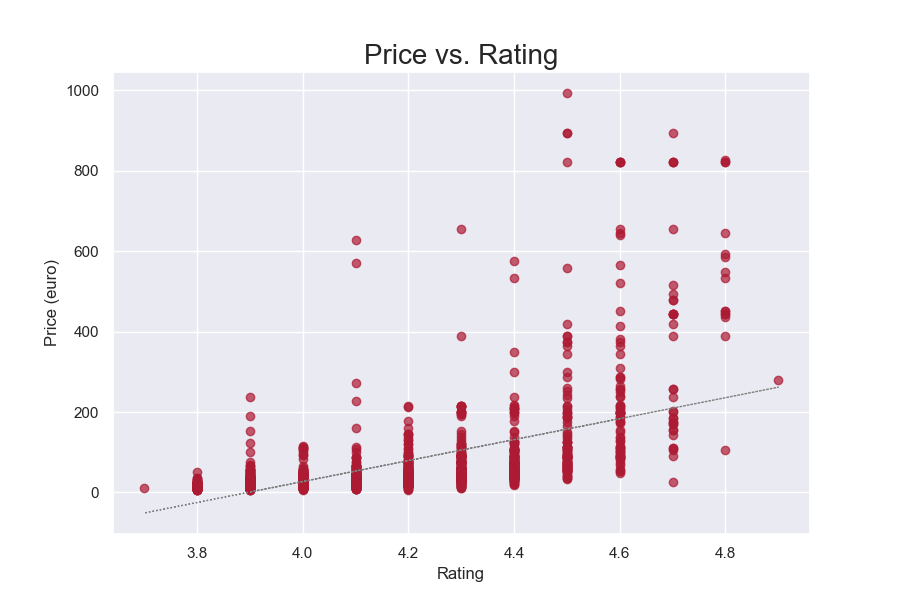

In [21]:
fig, ax = plt.subplots(figsize=(9,6))
rate_price = df[(df['price'] < 1000) & (df['rating'] != None)]

x = rate_price['rating']
y = rate_price['price']

ax.scatter(x, y, color = plot_color, alpha=.7)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x),color='grey', linewidth=1, linestyle=':')

plt.xlabel('Rating')
plt.ylabel('Price (euro)')
plt.title('Price vs. Rating', fontsize = 20)
plt.savefig('images/price_vs_rating_1.png')

In [ ]:
# There is weak positive correlation (r = 0.46)